### ISC CamCan Suspense

This notebook assesses the relationship between dynamic ISC and CRM data.

### setting up modules

In [1]:
import os, sys, scipy, nilearn, warnings
warnings.filterwarnings("ignore")
import numpy as np
from nilearn import plotting, input_data
from nilearn.input_data import NiftiLabelsMasker
import seaborn as sns
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from camcan_utils import *

### set up files

In [2]:
suspense_file         = '../../data/avg_suspense.npy'
shen_dictionary_file  = '../../data/shen_dictionary.npy'
dyn_isc_file          = '../../data/dyn_isc_dict.npy'

### permutation analysis of dynamic ISC

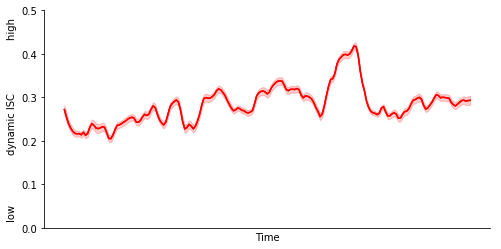

In [3]:
 
'''### compute main sliding window analysis across full data (takes a while - hence precomputed)

n_iterations = 100

#### set up two sub-samples (for consistency check)
subject_chunks = [[0, int(n_subjs/2)],
                  [int(n_subjs/2), n_subjs]]

n_subgroups = len(subject_chunks)

dyn_isc_result = np.zeros((n_iterations ,n_tr, n_regions))


for curr_iteration in range(n_iterations):
    print('Working on iteration #', (curr_iteration +1 ), ' of ', n_iterations)
    
    #randomize subject array
    sub_index = np.arange(n_subjs)
    np.random.shuffle(sub_index)

    people_to_use = np.arange(subject_chunks[0][0], subject_chunks[0][1], 1)
    D = ts_data[:,:,sub_index[people_to_use] ]
    dyn_isc_result[curr_iteration,0, :, :] = camcan_sliding_isc(D)
    
    

### save results - because computing them every time from scratch takes a lot of time 
### we save the output here so we can load it quicker later on

dyn_isc_dict = {}
dyn_isc_dict['dyn_isc_result_splithalf'] = dyn_isc_result

np.save('../../data/dyn_isc_dict_resampled100.npy', dyn_isc_dict) 
'''

# if precomputed
dyn_isc_dict = np.load('../../data/dyn_isc_dict_resampled100.npy').item() 
dyn_isc_dict.keys()
dyn_isc_result_many = dyn_isc_dict['dyn_isc_result_splithalf']

d = np.hstack(np.squeeze(np.nanmean(dyn_isc_result_many, axis=2)))
h = np.hstack([np.arange(193)] * 100)
dh = np.vstack((d,h)).T
df_dh = pd.DataFrame(data =  dh, columns = ['a','b'])

suspense = np.load(suspense_file)


f = plt.figure(figsize=(8,4));
sns.lineplot(x="b", 
             y="a", 
             color = 'red',
             ci = 'sd', #using sd instead of SEM because the latter got too small
             data=df_dh);
plt.plot(np.nanmean(np.squeeze(np.nanmean(dyn_isc_result_many, axis=2)), axis=0), color ='red');

plt.ylabel('low                dynamic ISC                 high');
plt.xlabel('Time');
plt.ylim(0,0.5);
plt.xticks([]);
#plt.yticks([]);
sns.despine();

### reviewer comment auditory , visual

30.25% Middle_Temporal_Gyrus_posterior_division; 26.95% Superior_Temporal_Gyrus_posterior_division; 21.00% Superior_Temporal_Gyrus_anterior_division; 8.72% Middle_Temporal_Gyrus_anterior_division; 6.34% Planum_Polare
Mean DynISC:0.697656797682823
Std DynISC:0.16937977630481763
Min DynISC:0.24179350489211968
Max DynISC:0.9039768674984635
Corr2Suspense:-0.06
46.71% Lateral_Occipital_Cortex_superior_division; 32.88% Occipital_Pole; 20.40% Lateral_Occipital_Cortex_inferior_division
Mean DynISC:0.6351633800566989
Std DynISC:0.11573503011784061
Min DynISC:0.33453221588175924
Max DynISC:0.8894541500956432
Corr2Suspense:-0.14


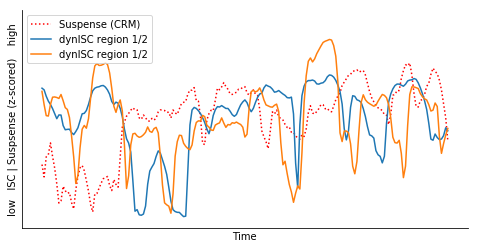

In [6]:
dyn_isc_dict = np.load(dyn_isc_file).item() 
dyn_isc_result_all = dyn_isc_dict['dyn_isc_result_all']

f = plt.figure(figsize=(8,4));
plt.plot(scipy.stats.zscore(suspense), color = 'red', linestyle = ':' , label = 'Suspense (CRM)');

for curr_region in [196, 203]: #for auditory and visual cortex
    shen_dictionary = np.load(shen_dictionary_file).item()
    curr_title = shen_dictionary[curr_region + 1]['name'] 
    print(curr_title)
    print('Mean DynISC:' + str(np.mean(dyn_isc_result_all[:,curr_region])))
    print('Std DynISC:'  + str(np.std(dyn_isc_result_all[:,curr_region])))
    print('Min DynISC:'  + str(np.min(dyn_isc_result_all[:,curr_region])))
    print('Max DynISC:'  + str(np.max(dyn_isc_result_all[:,curr_region])))
    plt.plot(scipy.stats.zscore(dyn_isc_result_all[:,curr_region]),  label = 'dynISC region 1/2');

    print('Corr2Suspense:' +  str(np.round(np.corrcoef(
                     (scipy.stats.zscore(dyn_isc_result_all[:,curr_region]) ),
                      scipy.stats.zscore(suspense))[0,1], 2)) )

#plt.plot(scipy.stats.zscore(dyn_isc_result_all[:,curr_region2]),             color = 'green', label = 'dynISC visual (all)');

plt.legend(loc = 2)
plt.ylim(-3, 3)
plt.xlabel('Time')
plt.ylabel('low   ISC | Suspsense (z-scored)    high')
plt.xticks([]);
plt.yticks([]);
sns.despine()



30.25% Middle_Temporal_Gyrus_posterior_division; 26.95% Superior_Temporal_Gyrus_posterior_division; 21.00% Superior_Temporal_Gyrus_anterior_division; 8.72% Middle_Temporal_Gyrus_anterior_division; 6.34% Planum_Polare
Mean DynISC:0.697656797682823
Std DynISC:0.16937977630481763
Min DynISC:0.24179350489211968
Max DynISC:0.9039768674984635
46.71% Lateral_Occipital_Cortex_superior_division; 32.88% Occipital_Pole; 20.40% Lateral_Occipital_Cortex_inferior_division
Mean DynISC:0.6351633800566989
Std DynISC:0.11573503011784061
Min DynISC:0.33453221588175924
Max DynISC:0.8894541500956432


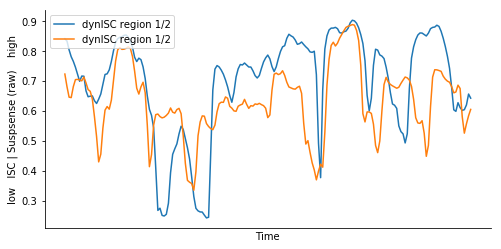

In [7]:
dyn_isc_dict = np.load(dyn_isc_file).item() 
dyn_isc_result_all = dyn_isc_dict['dyn_isc_result_all']

f = plt.figure(figsize=(8,4));

for curr_region in [196, 203]: #for auditory and visual cortex
    shen_dictionary = np.load(shen_dictionary_file).item()
    curr_title = shen_dictionary[curr_region + 1]['name'] 
    print(curr_title)
    print('Mean DynISC:' + str(np.mean(dyn_isc_result_all[:,curr_region])))
    print('Std DynISC:'  + str(np.std(dyn_isc_result_all[:,curr_region])))
    print('Min DynISC:'  + str(np.min(dyn_isc_result_all[:,curr_region])))
    print('Max DynISC:'  + str(np.max(dyn_isc_result_all[:,curr_region])))
    plt.plot(dyn_isc_result_all[:,curr_region],  label = 'dynISC region 1/2');

#plt.plot(scipy.stats.zscore(dyn_isc_result_all[:,curr_region2]),             color = 'green', label = 'dynISC visual (all)');

plt.legend(loc = 2)
#plt.ylim(-3, 3)
plt.xlabel('Time')
plt.ylabel('low   ISC | Suspsense (raw)    high')
plt.xticks([]);
#plt.yticks([]);
sns.despine()

